In [1]:
!pip install pandas==1.5.3
!pip install numpy
!pip install json
!pip install findspark
!pip install wordcloud
!pip install matplotlib
!pip install seaborn
!pip install nltk
!pip install scikit-learn
!pip install regex
!pip install app_store_scrapper

     ---------------------------------------- 0.0/10.3 MB ? eta -:--:--
     ---------------------------------------- 0.1/10.3 MB 1.3 MB/s eta 0:00:08
      --------------------------------------- 0.2/10.3 MB 2.4 MB/s eta 0:00:05
     - -------------------------------------- 0.5/10.3 MB 3.7 MB/s eta 0:00:03
     --- ------------------------------------ 0.8/10.3 MB 4.9 MB/s eta 0:00:02
     ----- ---------------------------------- 1.4/10.3 MB 6.4 MB/s eta 0:00:02
     ------ --------------------------------- 1.6/10.3 MB 6.7 MB/s eta 0:00:02
     ------ --------------------------------- 1.8/10.3 MB 5.6 MB/s eta 0:00:02
     ---------- ----------------------------- 2.8/10.3 MB 7.8 MB/s eta 0:00:01
     ------------- -------------------------- 3.4/10.3 MB 8.3 MB/s eta 0:00:01
     -------------- ------------------------- 3.7/10.3 MB 8.5 MB/s eta 0:00:01
     -------------- ------------------------- 3.7/10.3 MB 8.5 MB/s eta 0:00:01
     ------------------- -------------------- 5.0/10.3 MB 9

ERROR: Could not find a version that satisfies the requirement json (from versions: none)
ERROR: No matching distribution found for json


ERROR: Could not find a version that satisfies the requirement app_store_scrapper (from versions: none)
ERROR: No matching distribution found for app_store_scrapper


Data collection

In [3]:
import pandas as pd
import numpy as np
import json
from app_store_scraper import AppStore

In [4]:
response = AppStore(country='us', app_name='snapchat', app_id='447188370')

response.review()

2023-08-10 13:25:52,983 [INFO] Base - Initialised: AppStore('us', 'snapchat', 447188370)
2023-08-10 13:25:52,983 [INFO] Base - Ready to fetch reviews from: https://apps.apple.com/us/app/snapchat/id447188370
2023-08-10 13:25:58,092 [INFO] Base - [id:447188370] Fetched 200 reviews (200 fetched in total)
2023-08-10 13:26:03,919 [INFO] Base - [id:447188370] Fetched 420 reviews (420 fetched in total)
2023-08-10 13:26:09,588 [INFO] Base - [id:447188370] Fetched 660 reviews (660 fetched in total)
2023-08-10 13:26:15,320 [INFO] Base - [id:447188370] Fetched 920 reviews (920 fetched in total)
2023-08-10 13:26:21,187 [INFO] Base - [id:447188370] Fetched 1180 reviews (1180 fetched in total)
2023-08-10 13:26:27,784 [INFO] Base - [id:447188370] Fetched 1400 reviews (1400 fetched in total)
2023-08-10 13:26:33,511 [INFO] Base - [id:447188370] Fetched 1640 reviews (1640 fetched in total)
2023-08-10 13:26:39,206 [INFO] Base - [id:447188370] Fetched 1880 reviews (1880 fetched in total)
2023-08-10 13:27:

In [10]:
df = pd.DataFrame(np.array(response.reviews),columns=['review'])
df = df.join(pd.DataFrame(df.pop('review').tolist()))
df.head()

,date,review,rating,isEdited,title,userName
0,2023-04-27 12:32:02,I’ve had Snapchat since 2013. Every update bef...,5,False,AI is a Fun Update!,Weak Minds Hate AI
1,2023-05-02 23:36:07,"I usually love Snapchat, it’s one of my favori...",1,False,"I don’t want My AI, and it’s unfair that non-p...",ajdhhkfabocopwjdka1279!
2,2023-06-04 20:28:17,"Snapchat is typically good, never really had a...",3,False,Snapchat’s Video Call Feature,lozthewiz
3,2023-07-24 23:36:12,I went into Snapchat one morning to find mysel...,1,False,Snap has a bug and they won’t fix it!!,RemiRoo1327
4,2023-04-23 16:33:35,Either make your new AI experiment bearable to...,1,False,My AI moment.,judicial branch


In [12]:
snap_old = pd.read_csv('snapchat_old.csv')
snap_old

,Unnamed: 0,userName,rating,review,isEdited,date,title
0,0,Savvanananahhh,4,For the most part I quite enjoy Snapchat it’s ...,False,10/4/20 6:01,Performance issues
1,1,Idek 9-101112,3,"I’m sorry to say it, but something is definite...",False,10/14/20 2:13,What happened?
2,2,William Quintana,3,Snapchat update ruined my story organization! ...,False,7/31/20 19:54,STORY ORGANIZATION RUINED!
3,3,an gonna be unkown😏,5,I really love the app for how long i have been...,False,4/22/21 14:10,The app is great
4,4,gzhangziqi,1,This is super frustrating. I was in the middle...,False,10/2/20 13:58,"Locked me out, customer service not helping"
...,...,...,...,...,...,...,...
9555,9555,geekygirl17,1,I used to love using Snapchat and now I hardly...,False,6/24/19 0:58,Major issue...not that it will get fixed
9556,9556,changemaker kkdd,2,"Well, I did deleted it because there was some ...",False,6/23/19 13:42,I got then deleted it.
9557,9557,teekay2much,4,Every time I upload a photo or video to my sto...,False,6/3/19 3:35,Story problem
9558,9558,whoratheexplora,4,"Love this app, but since he update I can’t upl...",False,6/3/19 3:26,Bugs


In [13]:
snap_old.drop('Unnamed: 0',axis=1,inplace=True)

In [15]:
df = pd.concat([df, snap_old])
df

,date,review,rating,isEdited,title,userName
0,2023-04-27 12:32:02,I’ve had Snapchat since 2013. Every update bef...,5,False,AI is a Fun Update!,Weak Minds Hate AI
1,2023-05-02 23:36:07,"I usually love Snapchat, it’s one of my favori...",1,False,"I don’t want My AI, and it’s unfair that non-p...",ajdhhkfabocopwjdka1279!
2,2023-06-04 20:28:17,"Snapchat is typically good, never really had a...",3,False,Snapchat’s Video Call Feature,lozthewiz
3,2023-07-24 23:36:12,I went into Snapchat one morning to find mysel...,1,False,Snap has a bug and they won’t fix it!!,RemiRoo1327
4,2023-04-23 16:33:35,Either make your new AI experiment bearable to...,1,False,My AI moment.,judicial branch
...,...,...,...,...,...,...
9555,6/24/19 0:58,I used to love using Snapchat and now I hardly...,1,False,Major issue...not that it will get fixed,geekygirl17
9556,6/23/19 13:42,"Well, I did deleted it because there was some ...",2,False,I got then deleted it.,changemaker kkdd
9557,6/3/19 3:35,Every time I upload a photo or video to my sto...,4,False,Story problem,teekay2much
9558,6/3/19 3:26,"Love this app, but since he update I can’t upl...",4,False,Bugs,whoratheexplora


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12100 entries, 0 to 9559
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      12100 non-null  object
 1   review    12100 non-null  object
 2   rating    12100 non-null  int64 
 3   isEdited  12100 non-null  bool  
 4   title     12100 non-null  object
 5   userName  12100 non-null  object
dtypes: bool(1), int64(1), object(4)
memory usage: 579.0+ KB


In [17]:
df['date'] = pd.to_datetime(df['date'])

In [18]:
df.dtypes

date        datetime64[ns]
review              object
rating               int64
isEdited              bool
title               object
userName            object
dtype: object

In [19]:
df.isna().sum()/df.shape[0]

date        0.0
review      0.0
rating      0.0
isEdited    0.0
title       0.0
userName    0.0
dtype: float64

In [20]:
df['sentiment'] = np.where(df['rating']==3, 'Neutral', np.where(df['rating']>3, 'Positive', 'Negative'))
df['sentiment'].value_counts()

Positive    5216
Negative    4406
Neutral     2478
Name: sentiment, dtype: int64

In [21]:
df

,date,review,rating,isEdited,title,userName,sentiment
0,2023-04-27 12:32:02,I’ve had Snapchat since 2013. Every update bef...,5,False,AI is a Fun Update!,Weak Minds Hate AI,Positive
1,2023-05-02 23:36:07,"I usually love Snapchat, it’s one of my favori...",1,False,"I don’t want My AI, and it’s unfair that non-p...",ajdhhkfabocopwjdka1279!,Negative
2,2023-06-04 20:28:17,"Snapchat is typically good, never really had a...",3,False,Snapchat’s Video Call Feature,lozthewiz,Neutral
3,2023-07-24 23:36:12,I went into Snapchat one morning to find mysel...,1,False,Snap has a bug and they won’t fix it!!,RemiRoo1327,Negative
4,2023-04-23 16:33:35,Either make your new AI experiment bearable to...,1,False,My AI moment.,judicial branch,Negative
...,...,...,...,...,...,...,...
9555,2019-06-24 00:58:00,I used to love using Snapchat and now I hardly...,1,False,Major issue...not that it will get fixed,geekygirl17,Negative
9556,2019-06-23 13:42:00,"Well, I did deleted it because there was some ...",2,False,I got then deleted it.,changemaker kkdd,Negative
9557,2019-06-03 03:35:00,Every time I upload a photo or video to my sto...,4,False,Story problem,teekay2much,Positive
9558,2019-06-03 03:26:00,"Love this app, but since he update I can’t upl...",4,False,Bugs,whoratheexplora,Positive


In [23]:
df['date_cutted'] = [str(x)[:7] for x in df.date]
df['month'] = [date.month for date in df['date']]
df['year'] = [date.year for date in df['date']]
df['day'] = [date.day for date in df['date']]
df

,date,review,rating,isEdited,title,userName,sentiment,date_cutted,month,year,day
0,2023-04-27 12:32:02,I’ve had Snapchat since 2013. Every update bef...,5,False,AI is a Fun Update!,Weak Minds Hate AI,Positive,2023-04,4,2023,27
1,2023-05-02 23:36:07,"I usually love Snapchat, it’s one of my favori...",1,False,"I don’t want My AI, and it’s unfair that non-p...",ajdhhkfabocopwjdka1279!,Negative,2023-05,5,2023,2
2,2023-06-04 20:28:17,"Snapchat is typically good, never really had a...",3,False,Snapchat’s Video Call Feature,lozthewiz,Neutral,2023-06,6,2023,4
3,2023-07-24 23:36:12,I went into Snapchat one morning to find mysel...,1,False,Snap has a bug and they won’t fix it!!,RemiRoo1327,Negative,2023-07,7,2023,24
4,2023-04-23 16:33:35,Either make your new AI experiment bearable to...,1,False,My AI moment.,judicial branch,Negative,2023-04,4,2023,23
...,...,...,...,...,...,...,...,...,...,...,...
9555,2019-06-24 00:58:00,I used to love using Snapchat and now I hardly...,1,False,Major issue...not that it will get fixed,geekygirl17,Negative,2019-06,6,2019,24
9556,2019-06-23 13:42:00,"Well, I did deleted it because there was some ...",2,False,I got then deleted it.,changemaker kkdd,Negative,2019-06,6,2019,23
9557,2019-06-03 03:35:00,Every time I upload a photo or video to my sto...,4,False,Story problem,teekay2much,Positive,2019-06,6,2019,3
9558,2019-06-03 03:26:00,"Love this app, but since he update I can’t upl...",4,False,Bugs,whoratheexplora,Positive,2019-06,6,2019,3


In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='date_cutted'>

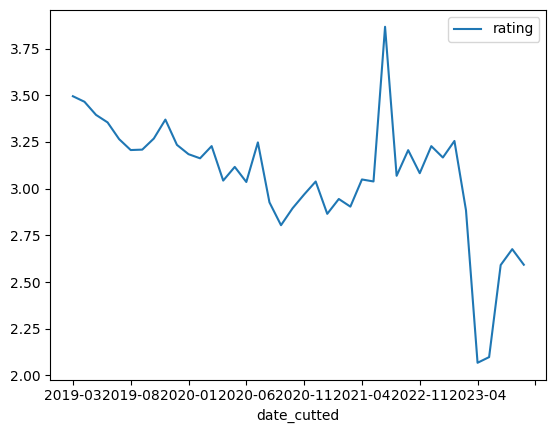

In [25]:
df[['date_cutted','rating']].groupby('date_cutted').mean().plot()

In [29]:
res = df[['date_cutted','sentiment']].groupby('date_cutted').apply(lambda g: pd.DataFrame([np.round(g.value_counts().values/sum(g.value_counts().values),2)],columns=['Pos','Neu','Neg'])).reset_index()

<Axes: xlabel='date_cutted'>

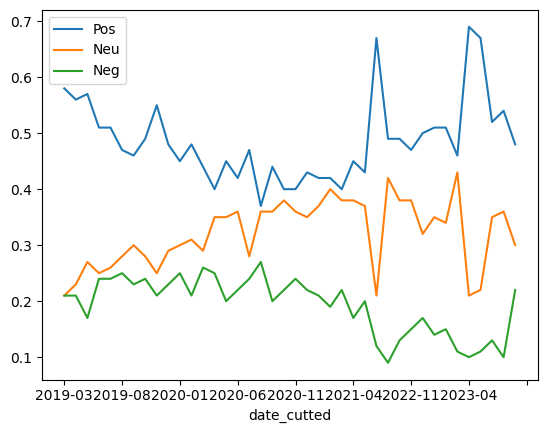

In [31]:
res.drop('level_1',axis=1).set_index('date_cutted').plot()

In [34]:
res = df[['date_cutted','rating']].groupby('date_cutted').apply(lambda g: pd.Series([len(g), g.mean()[0]])).sort_values(1).head(30)

C:\Users\hp\AppData\Local\Temp\ipykernel_19860\2443011474.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  res = df[['date_cutted','rating']].groupby('date_cutted').apply(lambda g: pd.Series([len(g), g.mean()[0]])).sort_values(1).head(30)
C:\Users\hp\AppData\Local\Temp\ipykernel_19860\2443011474.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  res = df[['date_cutted','rating']].groupby('date_cutted').apply(lambda g: pd.Series([len(g), g.mean()[0]])).sort_values(1).head(30)
C:\Users\hp\AppData\Local\Temp\ipykernel_19860\24430

In [35]:
res

,0,1
date_cutted,,
2023-04,636.0,2.067610
2023-05,347.0,2.097983
2023-06,220.0,2.590909
2023-08,54.0,2.592593
2023-07,179.0,2.675978
2020-09,567.0,2.804233
2021-01,252.0,2.865079
2023-03,138.0,2.884058
2020-10,390.0,2.894872


In [36]:
df

,date,review,rating,isEdited,title,userName,sentiment,date_cutted,month,year,day
0,2023-04-27 12:32:02,I’ve had Snapchat since 2013. Every update bef...,5,False,AI is a Fun Update!,Weak Minds Hate AI,Positive,2023-04,4,2023,27
1,2023-05-02 23:36:07,"I usually love Snapchat, it’s one of my favori...",1,False,"I don’t want My AI, and it’s unfair that non-p...",ajdhhkfabocopwjdka1279!,Negative,2023-05,5,2023,2
2,2023-06-04 20:28:17,"Snapchat is typically good, never really had a...",3,False,Snapchat’s Video Call Feature,lozthewiz,Neutral,2023-06,6,2023,4
3,2023-07-24 23:36:12,I went into Snapchat one morning to find mysel...,1,False,Snap has a bug and they won’t fix it!!,RemiRoo1327,Negative,2023-07,7,2023,24
4,2023-04-23 16:33:35,Either make your new AI experiment bearable to...,1,False,My AI moment.,judicial branch,Negative,2023-04,4,2023,23
...,...,...,...,...,...,...,...,...,...,...,...
9555,2019-06-24 00:58:00,I used to love using Snapchat and now I hardly...,1,False,Major issue...not that it will get fixed,geekygirl17,Negative,2019-06,6,2019,24
9556,2019-06-23 13:42:00,"Well, I did deleted it because there was some ...",2,False,I got then deleted it.,changemaker kkdd,Negative,2019-06,6,2019,23
9557,2019-06-03 03:35:00,Every time I upload a photo or video to my sto...,4,False,Story problem,teekay2much,Positive,2019-06,6,2019,3
9558,2019-06-03 03:26:00,"Love this app, but since he update I can’t upl...",4,False,Bugs,whoratheexplora,Positive,2019-06,6,2019,3


In [37]:
df['isEdited'].value_counts()

False    12100
Name: isEdited, dtype: int64

In [44]:
df['userName'].nunique()

12073

In [47]:
res = df.groupby('userName').apply(lambda g: pd.Series([len(g)]))
res = list(res[res[0]>1].index)
res

['#NAME?',
 '75mnm',
 'Boomer 19',
 'Callingcarolina',
 'Cheshire Katt',
 'JC.10117',
 'Jdpucket',
 'Lindsaybolander',
 'MIzzMoo12',
 'O2l lover connor is my bae',
 'Some1had2sayit',
 'Tisha1621',
 'William Quintana',
 'chaosgoth',
 'jdhcbf',
 'jliehu',
 'kjarkasy',
 'kota roo',
 'lex228848',
 'mf.candi',
 'mr windchester',
 'nevayuhhh',
 'odimaud',
 's.angelina.s',
 'xXxXXxJO..xXxXx']

In [49]:
df[df['userName'].isin(res)].sort_values(['userName','date'])

,date,review,rating,isEdited,title,userName,sentiment,date_cutted,month,year,day
4516,2019-09-19 02:55:00,I would like to know as to why YALL MF’s opene...,2,False,"OPENED ALL MY MESSAGES :,(",#NAME?,Negative,2019-09,9,2019,19
8319,2020-06-12 04:11:00,"This app used to be good, Ive been on it for y...",1,False,Ads,#NAME?,Negative,2020-06,6,2020,12
1538,2020-09-01 06:18:00,Snapchat hasn’t been working that well for me ...,1,False,Snapchat,#NAME?,Negative,2020-09,9,2020,1
7484,2021-01-13 14:47:00,Snapchat will freeze on me. It will then close...,4,False,BUGS!,#NAME?,Positive,2021-01,1,2021,13
7827,2021-03-17 23:43:00,I’ve had 2 people remove my on accident and ne...,4,False,People aren’t getting my friend requests,75mnm,Positive,2021-03,3,2021,17
1957,2022-08-21 01:51:56,Bitmojis let’s talk about them the animated lo...,3,False,Bitmojis in chat,75mnm,Neutral,2022-08,8,2022,21
6255,2020-10-31 17:22:00,Really makes me mad that I have to wait multip...,2,False,Fix your app,Boomer 19,Negative,2020-10,10,2020,31
2408,2022-09-06 08:22:23,I have had the app for years. And have dealt w...,1,False,Fix your app,Boomer 19,Negative,2022-09,9,2022,6
1867,2020-12-21 22:00:00,I love your app but it logged me out of my acc...,5,False,Logged me out of my account,Callingcarolina,Positive,2020-12,12,2020,21
307,2023-06-17 02:34:22,"Y’all, I swear I have tried to connect to y’al...",3,False,Error message when login into my iPhone,Callingcarolina,Neutral,2023-06,6,2023,17


In [50]:
df['review'].apply(lambda r: len(r.split(' '))).mean()

100.62074380165289

In [51]:
df['title'].apply(lambda r: len(r.split(' '))).mean()

3.740330578512397

Text preprocessing

In [64]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
stop_words = stopwords.words('english')
lemmatizer = WordNetLemmatizer()
text_cleaning_re = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [68]:
def preprocess(text, lemma=True):
    text = re.sub(text_cleaning_re, ' ', str(text).lower()).strip()
    tokens=[]
    for token in text.split():
        if token not in stop_words:
            if lemma:
                tokens.append(lemmatizer.lemmatize(token))
            else:
                tokens.append(token)
    return ' '.join(tokens)

In [66]:
titles = df[['title','sentiment']]
titles

,title,sentiment
0,AI is a Fun Update!,Positive
1,"I don’t want My AI, and it’s unfair that non-p...",Negative
2,Snapchat’s Video Call Feature,Neutral
3,Snap has a bug and they won’t fix it!!,Negative
4,My AI moment.,Negative
...,...,...
9555,Major issue...not that it will get fixed,Negative
9556,I got then deleted it.,Negative
9557,Story problem,Positive
9558,Bugs,Positive


In [69]:
titles['clean_text'] = titles['title'].apply(preprocess)
titles

C:\Users\hp\AppData\Local\Temp\ipykernel_19860\1210384905.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titles['clean_text'] = titles['title'].apply(preprocess)


,title,sentiment,clean_text
0,AI is a Fun Update!,Positive,ai fun update
1,"I don’t want My AI, and it’s unfair that non-p...",Negative,want ai unfair non paying user cannot remove
2,Snapchat’s Video Call Feature,Neutral,snapchat video call feature
3,Snap has a bug and they won’t fix it!!,Negative,snap bug fix
4,My AI moment.,Negative,ai moment
...,...,...,...
9555,Major issue...not that it will get fixed,Negative,major issue get fixed
9556,I got then deleted it.,Negative,got deleted
9557,Story problem,Positive,story problem
9558,Bugs,Positive,bug


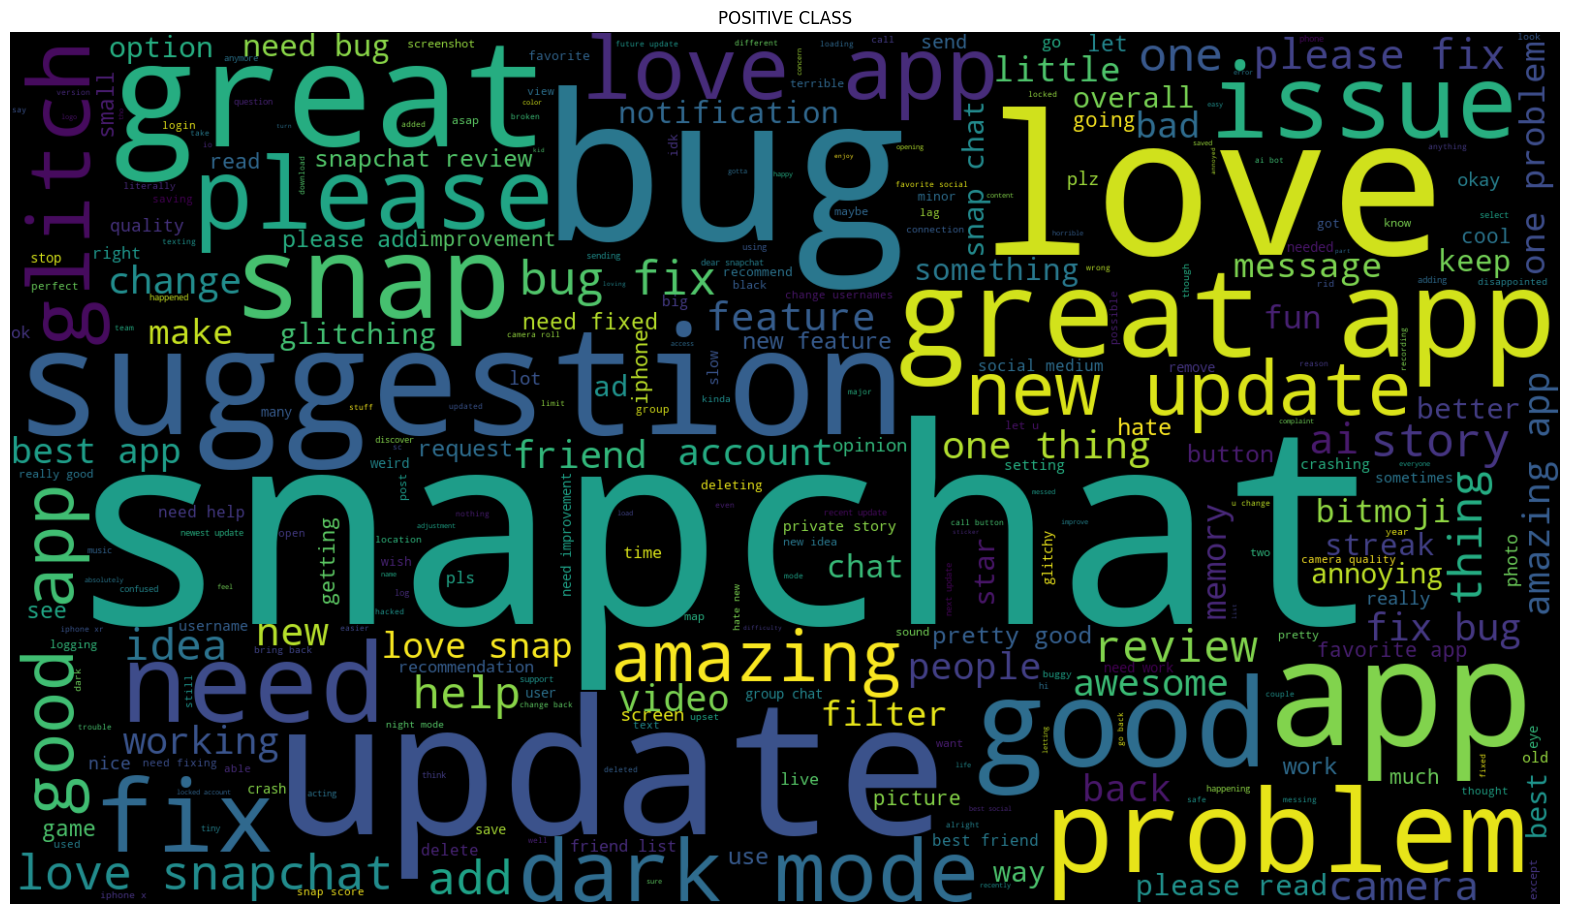

In [74]:
from wordcloud import WordCloud
wc = WordCloud(max_words=300, width=1600, height=900).generate(' '.join(titles[titles['sentiment']=='Positive']['clean_text'].values))
plt.figure(figsize=[20,16])
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title('POSITIVE CLASS')
plt.show()

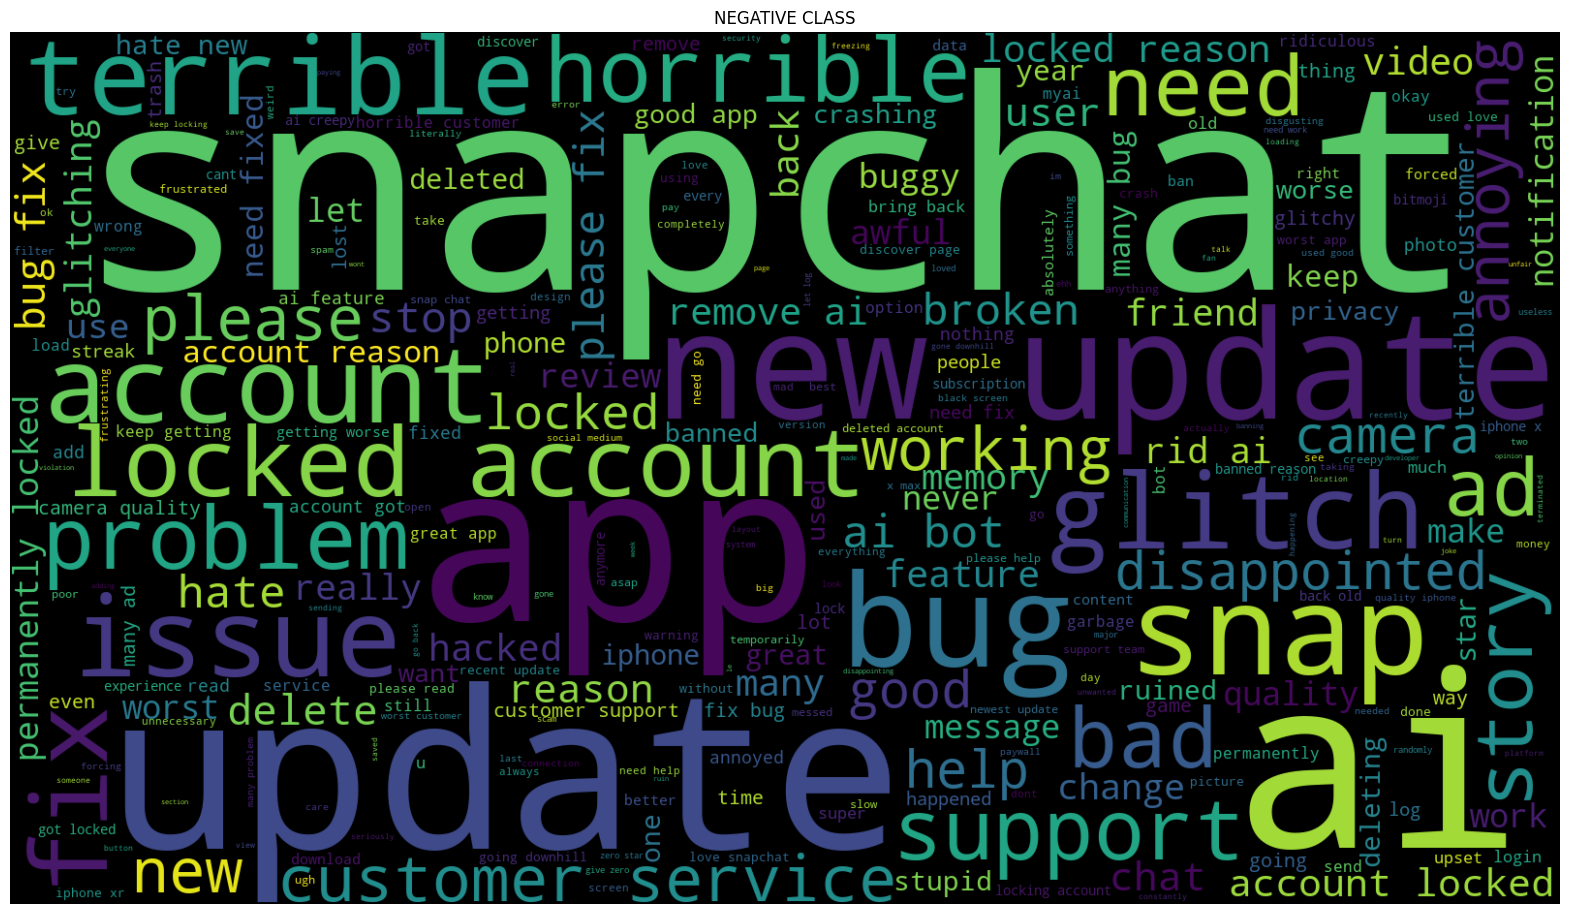

In [75]:
from wordcloud import WordCloud
wc = WordCloud(max_words=300, width=1600, height=900).generate(' '.join(titles[titles['sentiment']=='Negative']['clean_text'].values))
plt.figure(figsize=[20,16])
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title('NEGATIVE CLASS')
plt.show()

In [85]:
titles[['clean_text']].to_csv('clean_titles.csv',index=False,header=True)
titles[titles['sentiment'].isin(['Positive','Negative'])][['clean_text','sentiment']].replace({'Positive':1, 'Negative':0}).to_csv('clean_text_sent.csv',index=False,header=True)

In [92]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.master('local').appName('SentimenAnalysis').getOrCreate()

In [93]:
data = spark.read.csv('clean_titles.csv',header=True)

In [94]:
data.show()

+--------------------+
|          clean_text|
+--------------------+
|       ai fun update|
|want ai unfair no...|
|snapchat video ca...|
|        snap bug fix|
|           ai moment|
|           ai got go|
|            horrible|
|amazing app frien...|
|   great app helpful|
| good 10 12 year old|
|      dont even know|
|please let remove ai|
|              safety|
|   good app got flaw|
|banned account ad...|
|   straight uncalled|
| eh get worse update|
|    new update awful|
|                  ai|
|update banned gro...|
+--------------------+
only showing top 20 rows



In [97]:
from pyspark.sql.functions import col,isnan,when,count

In [98]:
data.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in data.columns]).show()

+----------+
|clean_text|
+----------+
|       148|
+----------+



In [99]:
data = data.dropna()

In [100]:
from pyspark.sql.functions import split

data=data.select(split(data.clean_text, ' ').alias('clean_text_splitted'))
data.show()

+--------------------+
| clean_text_splitted|
+--------------------+
|   [ai, fun, update]|
|[want, ai, unfair...|
|[snapchat, video,...|
|    [snap, bug, fix]|
|        [ai, moment]|
|       [ai, got, go]|
|          [horrible]|
|[amazing, app, fr...|
|[great, app, help...|
|[good, 10, 12, ye...|
|  [dont, even, know]|
|[please, let, rem...|
|            [safety]|
|[good, app, got, ...|
|[banned, account,...|
|[straight, uncalled]|
|[eh, get, worse, ...|
|[new, update, awful]|
|                [ai]|
|[update, banned, ...|
+--------------------+
only showing top 20 rows



In [101]:
from pyspark.ml.feature import CountVectorizer
cv = CountVectorizer(inputCol='clean_text_splitted',outputCol='features',vocabSize=500, minDF=3)
cv_model = cv.fit(data)
vectorized_tokens = cv_model.transform(data)

In [103]:
vectorized_tokens.show()

+--------------------+--------------------+
| clean_text_splitted|            features|
+--------------------+--------------------+
|   [ai, fun, update]|(500,[2,8,119],[1...|
|[want, ai, unfair...|(500,[8,64,91,134...|
|[snapchat, video,...|(500,[0,30,51,192...|
|    [snap, bug, fix]|(500,[3,4,10],[1....|
|        [ai, moment]|     (500,[8],[1.0])|
|       [ai, got, go]|(500,[8,76,81],[1...|
|          [horrible]|    (500,[47],[1.0])|
|[amazing, app, fr...|(500,[1,6,35,40],...|
|[great, app, help...|(500,[1,11],[1.0,...|
|[good, 10, 12, ye...|(500,[9,96,132,21...|
|  [dont, even, know]|(500,[153,177,295...|
|[please, let, rem...|(500,[8,12,55,64]...|
|            [safety]|   (500,[415],[1.0])|
|[good, app, got, ...|(500,[1,9,81],[1....|
|[banned, account,...|(500,[13,68,111,2...|
|[straight, uncalled]|         (500,[],[])|
|[eh, get, worse, ...|(500,[2,22,106,29...|
|[new, update, awful]|(500,[2,5,138],[1...|
|                [ai]|     (500,[8],[1.0])|
|[update, banned, ...|(500,[2,5,

In [104]:
from pyspark.ml.clustering import LDA

num_topics=7
lda=LDA(k=num_topics, maxIter=200)
model = lda.fit(vectorized_tokens)
model

LocalLDAModel: uid=LDA_e941eafff16f, k=7, numFeatures=500

In [105]:
vocab = cv_model.vocabulary
topics = model.describeTopics()
cnt=0
for t in topics.rdd.collect():
    cnt+=1
    print(f'Topic {cnt}: ' + str([vocab[i] for i in t['termIndices']]))

Topic 1: ['review', 'people', 'chat', 'log', 'screen', 'send', 'awful', 'happened', 'anymore', 'load']
Topic 2: ['bug', 'fix', 'love', 'need', 'please', 'mode', 'dark', 'change', 'read', 'fixed']
Topic 3: ['snapchat', 'update', 'new', 'problem', 'issue', 'camera', 'suggestion', 'love', 'hate', 'quality']
Topic 4: ['good', 'app', 'help', 'one', 'back', 'need', 'ad', 'thing', 'many', 'add']
Topic 5: ['memory', 'broken', 'weird', 'awesome', 'photo', 'loading', 'always', 'frustrating', 'ridiculous', 'trouble']
Topic 6: ['app', 'ai', 'snap', 'great', 'account', 'glitch', 'locked', 'story', 'get', 'amazing']
Topic 7: ['terrible', 'bad', 'like', 'service', 'customer', 'getting', 'message', 'keep', 'going', 'friend']


C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\pyspark\sql\context.py:125: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


In [107]:
data = spark.read.csv('clean_text_sent.csv',header=True)

In [108]:
data.show()

+--------------------+---------+
|          clean_text|sentiment|
+--------------------+---------+
|       ai fun update|        1|
|want ai unfair no...|        0|
|        snap bug fix|        0|
|           ai moment|        0|
|           ai got go|        0|
|            horrible|        0|
|amazing app frien...|        1|
|   great app helpful|        0|
| good 10 12 year old|        1|
|              safety|        0|
|   good app got flaw|        0|
|banned account ad...|        0|
|   straight uncalled|        0|
| eh get worse update|        0|
|    new update awful|        0|
|                  ai|        0|
|update banned gro...|        0|
|          1 star app|        1|
|        happy headed|        0|
|              beware|        0|
+--------------------+---------+
only showing top 20 rows



In [109]:
data.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in data.columns]).show()

+----------+---------+
|clean_text|sentiment|
+----------+---------+
|       111|        0|
+----------+---------+



In [110]:
data = data.dropna()

In [111]:
data = data.select(split(data.clean_text, ' ').alias('clean_text_splitted'),'sentiment')
data.show()

+--------------------+---------+
| clean_text_splitted|sentiment|
+--------------------+---------+
|   [ai, fun, update]|        1|
|[want, ai, unfair...|        0|
|    [snap, bug, fix]|        0|
|        [ai, moment]|        0|
|       [ai, got, go]|        0|
|          [horrible]|        0|
|[amazing, app, fr...|        1|
|[great, app, help...|        0|
|[good, 10, 12, ye...|        1|
|            [safety]|        0|
|[good, app, got, ...|        0|
|[banned, account,...|        0|
|[straight, uncalled]|        0|
|[eh, get, worse, ...|        0|
|[new, update, awful]|        0|
|                [ai]|        0|
|[update, banned, ...|        0|
|      [1, star, app]|        1|
|     [happy, headed]|        0|
|            [beware]|        0|
+--------------------+---------+
only showing top 20 rows



In [112]:
cv = CountVectorizer(inputCol='clean_text_splitted',outputCol='features', vocabSize=700, minDF=3)
cv_model = cv.fit(data)
vectorized_text = cv_model.transform(data)
vectorized_text.show()

+--------------------+---------+--------------------+
| clean_text_splitted|sentiment|            features|
+--------------------+---------+--------------------+
|   [ai, fun, update]|        1|(700,[2,4,126],[1...|
|[want, ai, unfair...|        0|(700,[4,56,83,123...|
|    [snap, bug, fix]|        0|(700,[3,5,11],[1....|
|        [ai, moment]|        0|(700,[4,492],[1.0...|
|       [ai, got, go]|        0|(700,[4,68,75],[1...|
|          [horrible]|        0|    (700,[41],[1.0])|
|[amazing, app, fr...|        1|(700,[1,6,24,38],...|
|[great, app, help...|        0|(700,[1,9,638],[1...|
|[good, 10, 12, ye...|        1|(700,[10,92,121,1...|
|            [safety]|        0|   (700,[432],[1.0])|
|[good, app, got, ...|        0|(700,[1,10,75,566...|
|[banned, account,...|        0|(700,[13,72,87,22...|
|[straight, uncalled]|        0|         (700,[],[])|
|[eh, get, worse, ...|        0|(700,[2,23,107,40...|
|[new, update, awful]|        0|(700,[2,7,129],[1...|
|                [ai]|      

In [113]:
vectorized_text.dtypes

[('clean_text_splitted', 'array<string>'),
 ('sentiment', 'string'),
 ('features', 'vector')]

In [114]:
df = vectorized_text.select(col('sentiment').cast('int'),'features')
df.show()

+---------+--------------------+
|sentiment|            features|
+---------+--------------------+
|        1|(700,[2,4,126],[1...|
|        0|(700,[4,56,83,123...|
|        0|(700,[3,5,11],[1....|
|        0|(700,[4,492],[1.0...|
|        0|(700,[4,68,75],[1...|
|        0|    (700,[41],[1.0])|
|        1|(700,[1,6,24,38],...|
|        0|(700,[1,9,638],[1...|
|        1|(700,[10,92,121,1...|
|        0|   (700,[432],[1.0])|
|        0|(700,[1,10,75,566...|
|        0|(700,[13,72,87,22...|
|        0|         (700,[],[])|
|        0|(700,[2,23,107,40...|
|        0|(700,[2,7,129],[1...|
|        0|     (700,[4],[1.0])|
|        0|(700,[2,7,87,592]...|
|        1|(700,[1,60,213],[...|
|        0|   (700,[289],[1.0])|
|        0|         (700,[],[])|
+---------+--------------------+
only showing top 20 rows



In [115]:
df.dtypes

[('sentiment', 'int'), ('features', 'vector')]

In [116]:
seed = 42
trainDF, testDF = df.randomSplit([0.7, 0.3], seed)

In [117]:
df.groupby('sentiment').count().show()

+---------+-----+
|sentiment|count|
+---------+-----+
|        1| 5154|
|        0| 4357|
+---------+-----+



In [118]:
trainDF.groupby('sentiment').count().show()

+---------+-----+
|sentiment|count|
+---------+-----+
|        1| 3627|
|        0| 3118|
+---------+-----+



In [119]:
testDF.groupby('sentiment').count().show()

+---------+-----+
|sentiment|count|
+---------+-----+
|        1| 1527|
|        0| 1239|
+---------+-----+



In [120]:
from pyspark.ml.classification import LogisticRegression

In [122]:
lr = LogisticRegression(labelCol='sentiment',featuresCol='features', maxIter=10, regParam=0.01)
model = lr.fit(trainDF)

In [123]:
preds = model.transform(testDF)
preds = preds.toPandas()
preds.sample(10)

,sentiment,features,rawPrediction,probability,prediction
2329,1,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-2.728673214391577, 2.728673214391577]","[0.0613024675762875, 0.9386975324237125]",1.0
1473,1,"(0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...","[0.3834821577208371, -0.3834821577208371]","[0.5947126817445972, 0.40528731825540276]",0.0
208,0,"(0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[2.652875495346431, -2.652875495346431]","[0.9341879990839662, 0.06581200091603379]",0.0
2224,1,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-3.2864731893088335, 3.2864731893088335]","[0.03603816494700231, 0.9639618350529977]",1.0
1896,1,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...","[-2.83389910805524, 2.83389910805524]","[0.05551958507579867, 0.9444804149242013]",1.0
970,0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.6767357012284791, -0.6767357012284791]","[0.6630097507711573, 0.3369902492288427]",0.0
1453,1,"(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.6515052974435255, 0.6515052974435255]","[0.34265040220555104, 0.657349597794449]",1.0
629,0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[3.923492770727564, -3.923492770727564]","[0.9806114338525159, 0.019388566147484076]",0.0
1447,1,"(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.7293459488389549, -0.7293459488389549]","[0.6746617291506355, 0.3253382708493645]",0.0
1760,1,"(0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.9021470605859947, 0.9021470605859947]","[0.28860947568225875, 0.7113905243177412]",1.0


In [128]:
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix

In [130]:
accuracy_score(preds.sentiment, preds.prediction)

0.7382501807664498

In [132]:
res = classification_report(preds.sentiment, preds.prediction)
print(res)

              precision    recall  f1-score   support

           0       0.73      0.66      0.69      1239
           1       0.74      0.80      0.77      1527

    accuracy                           0.74      2766
   macro avg       0.74      0.73      0.73      2766
weighted avg       0.74      0.74      0.74      2766



Exception ignored in: <function JavaWrapper.__del__ at 0x0000029F76658A40>
Traceback (most recent call last):
  File "C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\pyspark\ml\wrapper.py", line 39, in __del__
    if SparkContext._active_spark_context and self._java_obj is not None:
                                              ^^^^^^^^^^^^^^
AttributeError: 'BinaryClassificationEvaluator' object has no attribute '_java_obj'


<Axes: >

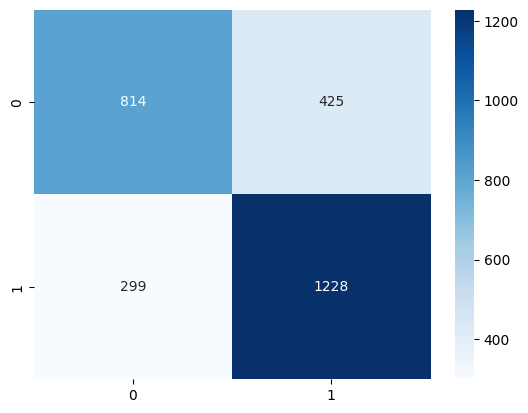

In [134]:
sns.heatmap(confusion_matrix(preds.sentiment, preds.prediction), annot=True, fmt='d', cmap='Blues')